In [1]:
import warnings, gc
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings("ignore")
import yfinance as yf         # import Yahoo! Finance

Significado de nombres de columnas:

*   open = precio al cual la acción comienza a la venta al inicio del dia
*   close = precio de la acción cuando el mercado cierra el dia. Representa última compra-venta entre corredores
*   high = el precio más alto en el que la acción fue vendida durante un período
*   low = el más bajo precio de un período
*   volume = el total de acciones vendidas en un período



El precio de cierre determina como la acción rindió durante el día. 

Se suele usar como medida estandard del valor de una acción el de una fecha específica, como fin de año.

La diferencia entre el inicio y cierre del valor de las acciones dividido por el valor de inicio es el rendimiento (return) en porcentaje

Traemos los datos de stocks de varios sectores: real state, finance, technology, industry, healthcare

In [2]:
df = pd.read_csv('/content/drive/MyDrive/pi2henry/data_df.csv', index_col=0)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name,sector,Date
0,42.075376,42.075376,40.103093,40.709949,550500.0,0.0,0.0,American Tower Corporation (REI,Real Estate,2000-03-27
1,40.861661,41.670802,40.052519,41.215660,643400.0,0.0,0.0,American Tower Corporation (REI,Real Estate,2000-03-28
2,41.519079,42.024793,40.052510,40.355938,487800.0,0.0,0.0,American Tower Corporation (REI,Real Estate,2000-03-29
3,40.254807,40.457092,39.041094,40.457092,673700.0,0.0,0.0,American Tower Corporation (REI,Real Estate,2000-03-30
4,40.457092,41.620233,39.142236,39.951378,529400.0,0.0,0.0,American Tower Corporation (REI,Real Estate,2000-03-31


Necesitamos el campo fecha como índice

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.sort_index(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1582542 entries, 2000-03-27 to 2023-03-24
Data columns (total 9 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Open          1582542 non-null  float64
 1   High          1582542 non-null  float64
 2   Low           1582542 non-null  float64
 3   Close         1582542 non-null  float64
 4   Volume        1582542 non-null  float64
 5   Dividends     1582542 non-null  float64
 6   Stock Splits  1582542 non-null  float64
 7   company_name  1582542 non-null  object 
 8   sector        1582542 non-null  object 
dtypes: float64(7), object(2)
memory usage: 120.7+ MB


In [6]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1.582542e+06,1.582542e+06,1.582542e+06,1.582542e+06,1.582542e+06,1.582542e+06,1.582542e+06
mean,6.536323e+01,6.613618e+01,6.456829e+01,6.537157e+01,6.403526e+06,4.528650e-03,3.953275e-04
std,9.100690e+01,9.208009e+01,8.987941e+01,9.100167e+01,3.626392e+07,9.707673e-02,3.173446e-02
min,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.797690e+01,1.823801e+01,1.771428e+01,1.798244e+01,7.770000e+05,0.000000e+00,0.000000e+00
50%,3.554553e+01,3.598976e+01,3.509805e+01,3.555551e+01,1.796000e+06,0.000000e+00,0.000000e+00
75%,7.366344e+01,7.445018e+01,7.286088e+01,7.367969e+01,4.312274e+06,0.000000e+00,0.000000e+00
max,1.706400e+03,1.714750e+03,1.696900e+03,1.702530e+03,7.421641e+09,3.250000e+01,1.000000e+01


### Volumen comerciado

<Axes: xlabel='Date'>

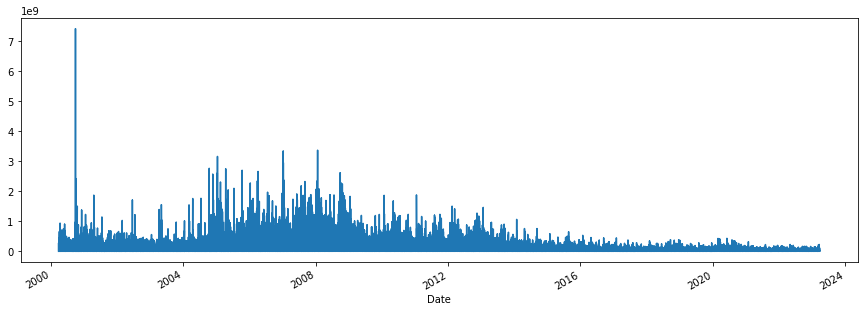

In [7]:
df.Volume.plot(figsize=(15,5))

Parece haber un outlier entre 2000 y 2002

In [8]:
before2002 = df[df.index.year < 2002]

In [9]:
before2002.Volume.describe()

count    1.019540e+05
mean     6.075138e+06
std      4.105587e+07
min      0.000000e+00
25%      3.749382e+05
50%      1.158000e+06
75%      3.333200e+06
max      7.421641e+09
Name: Volume, dtype: float64

In [10]:
#volumen mayor a mil millones
before2002[before2002.Volume > 1000000000]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name,sector
Date,,,,,,,,,
2000-09-29,0.428409,0.440758,0.385663,0.391362,7.421641e+09,0.0,0.0,Apple Inc.,Information Technology
2000-10-02,0.405612,0.406561,0.357166,0.368565,2.424789e+09,0.0,0.0,Apple Inc.,Information Technology
2000-10-03,0.379014,0.379964,0.337217,0.339118,2.038120e+09,0.0,0.0,Apple Inc.,Information Technology
2000-10-04,0.340068,0.360965,0.332468,0.359066,1.466024e+09,0.0,0.0,Apple Inc.,Information Technology
2000-10-11,0.305871,0.319169,0.290672,0.298271,1.198422e+09,0.0,0.0,Apple Inc.,Information Technology
2000-10-12,0.308720,0.316320,0.296371,0.303971,1.191064e+09,0.0,0.0,Apple Inc.,Information Technology
2000-10-13,0.307770,0.336267,0.303971,0.335318,1.247753e+09,0.0,0.0,Apple Inc.,Information Technology
2000-10-19,0.291147,0.301121,0.278323,0.287823,1.506725e+09,0.0,0.0,Apple Inc.,Information Technology
2000-12-06,0.222279,0.227978,0.212780,0.217529,1.374464e+09,0.0,0.0,Apple Inc.,Information Technology


A inicios del siglo 21 al parecer se comerció mas de mil millones de acciones en un solo dia, en repetidas ocasiones. Todas fueron de Apple

Alrededor de 2008 sucede otro pico de ventas

In [11]:
between20052009 = df.loc['2004':'2009']

In [12]:
between20052009[between20052009.Volume > 1000000000].company_name.unique()

array(['Apple Inc.', 'Bank of America Corporation'], dtype=object)

Esta vez además de Apple se suma el Bank of America Corporation. 

### Precio de Cierre (Closing Price)


El valor de cierre de las acciones es el punto de referencia estandard usado para seguir el rendimiento en el tiempo

Tomaremos el maximo valor de Close de cada año

Text(0.5, 1.0, 'Maximum Close value per year')

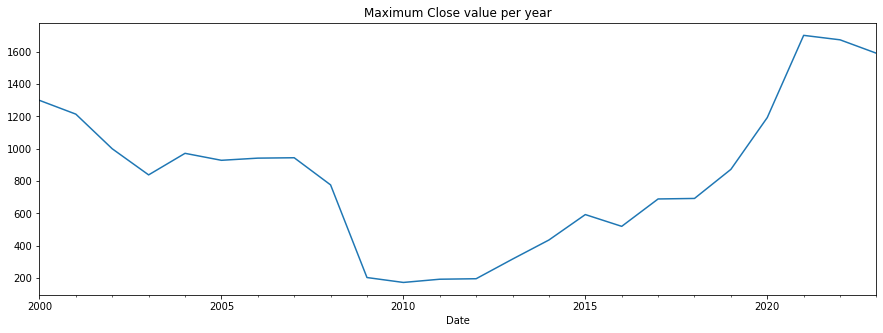

In [13]:
df['Close'].resample(rule='A').max().plot(figsize=(15,5))
plt.title('Maximum Close value per year')

Claramente hay una caída de precio de cierre máximo de las acciones entre 2008 y 2012. Tomemos ese rango

In [14]:
between20082012 = df.loc['2008':'2012']

Text(0.5, 1.0, 'Closing price')

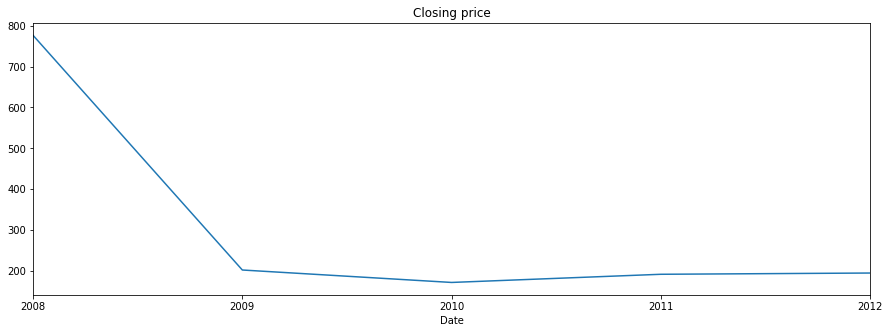

In [15]:
between20082012['Close'].resample(rule='A').max().plot(figsize=(15,5))

plt.title('Closing price')

Todos los sectores elegidos cerraron con un máximo valor de Close menor a valor 200 después de últimos meses de 2008 y hasta por lo menos inicio de 2013

 Tal vez esto es resultado de la crisis financiera del 2008 debido al colapso de la burbuja inmobiliaria en los Estados Unidos, generando una escases en los fondos destinados a inversiones.

Por otro lado vemos una curva exponencial de crecimiento a partir del 2019. Veamos como se comportan los sectores en ese lapso.

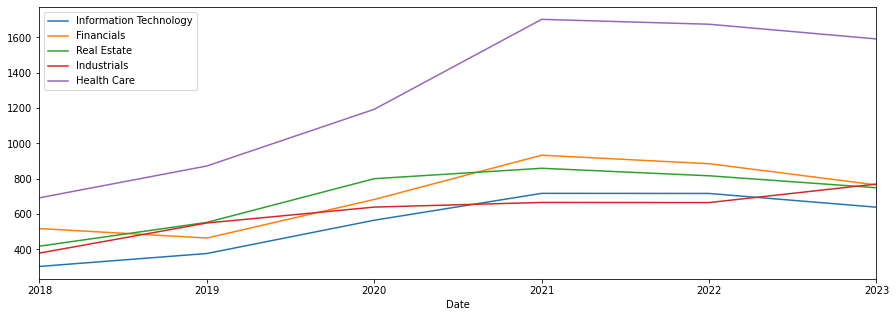

In [63]:
after2019  = df.loc['2018':]
after2019[after2019['sector']=='Information Technology'].Close.resample(rule='A').max().plot(figsize=(15,5),label='Information Technology')
after2019[after2019['sector']=='Financials'].Close.resample(rule='A').max().plot(figsize=(15,5), label='Financials')
after2019[after2019['sector']=='Real Estate'].Close.resample(rule='A').max().plot(figsize=(15,5), label='Real Estate')
after2019[after2019['sector']=='Industrials'].Close.resample(rule='A').max().plot(figsize=(15,5),label='Industrials')
after2019[after2019['sector']=='Health Care'].Close.resample(rule='A').max().plot(figsize=(15,5),label='Health Care')
plt.legend()

Vemos que el sector Health Care posee el valor de Close más alto desde el 2019, con pico en 2021. Gran parte de este comportamiento puede deberse a la pandemia mundial del 2020, que en un esfuerzo por solventarse requirió una fuerte inversión en vacunas y en productos de protección contra el virus, lo cual puede haber aumentado el valor de las acciones de varias empresas de este sector.

### Rendimiento (Return)

Agregamos la columna de rendimiento de la acción (return).

In [16]:
df['Return'] = ((df['Close'] - df['Open']) + df['Dividends'])/df['Open']


In [18]:
stocks_data = df.copy()

Graficamos el rendimiento diario (daily return) de las acciones

Text(0.5, 1.0, 'Daily return')

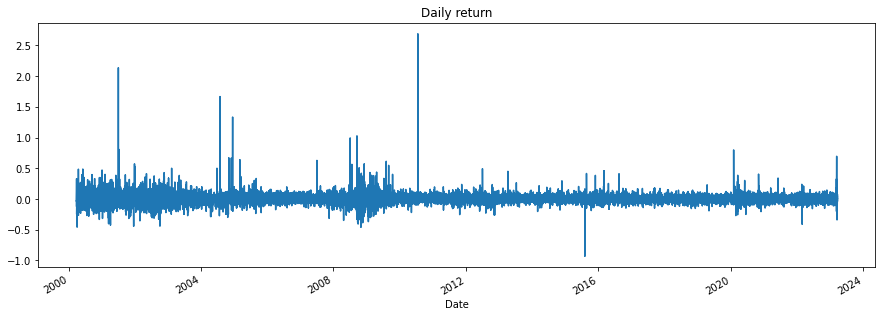

In [19]:
df['Return'].plot(figsize=(15,5))
plt.title('Daily return')

Más allá de los picos aislados de 2002, 2004 y 2010 se ve un período con mayor amplitud entre 2000 y 2004, y brevemente entre 2008 y 2010. 

Veamos quien genera esos picos en rendimiento de acciones

In [20]:
df[df['Return'] > 0.7]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name,sector,Return
Date,,,,,,,,,,
2001-07-02,10.373946,10.373946,8.813263,8.996873,3766200.0,23.51,0.0,Rockwell Automation Inc.,Industrials,2.133511
2001-07-09,18.098892,18.098892,17.564153,17.679327,429600.0,15.00,0.0,Equifax Inc.,Industrials,0.805598
2004-07-28,0.150000,0.400000,0.150000,0.400000,7000.0,0.00,0.0,Berkshire Hathaway Inc. New,Financials,1.666667
2004-12-14,0.300000,0.750000,0.300000,0.700000,72450.0,0.00,0.0,Berkshire Hathaway Inc. New,Financials,1.333333
2008-07-03,16.500891,16.889910,16.176707,16.322590,2640800.0,16.50,0.0,Fidelity National Information S,Information Technology,0.989140
2008-09-16,24.697626,68.352350,16.687585,50.062756,61554360.0,0.00,0.0,American International Group I,Financials,1.027027
2010-07-20,9.868021,10.331367,9.561211,9.980726,10219000.0,26.42,0.0,Weyerhaeuser Company,Real Estate,2.688757
2020-02-03,15.562792,16.420143,15.506876,15.982147,23063100.0,12.00,0.0,Gen Digital Inc.,Information Technology,0.798016


Pertenecen al sector financiero. 

Veamos las que generan picos de rendimiento negativo.

In [21]:
df[df['Return'] < -0.5]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name,sector,Return
Date,,,,,,,,,,
2015-08-06,1.22,1.22,0.05,0.0806,141993.0,0.0,0.0,Berkshire Hathaway Inc. New,Financials,-0.933934


Otra del sector financiero, parece ser un sector que presenta extremos en rendimiento de acciones de los 5 sectores elegidos.

Resamplearemos de alta frecuencia a baja frecuencia (Downsampling) de manera de distribuir los datos con una frecuencia consistente.


Claramente en 2010 hay un piso en el máximo valor de Close de las acciones

Simple Moving Average es un indicador técnico común. Calcula el promedio de precios sobre un intervalo de tiempo y es usado para determinar la tendencia de las acciones.

Crearemos un SMA de 15 dias y uno de 5 dias.

In [22]:
df['SMA_5'] = df['Close'].rolling(5).mean().shift()
df['SMA_15'] = df['Close'].rolling(15).mean().shift()

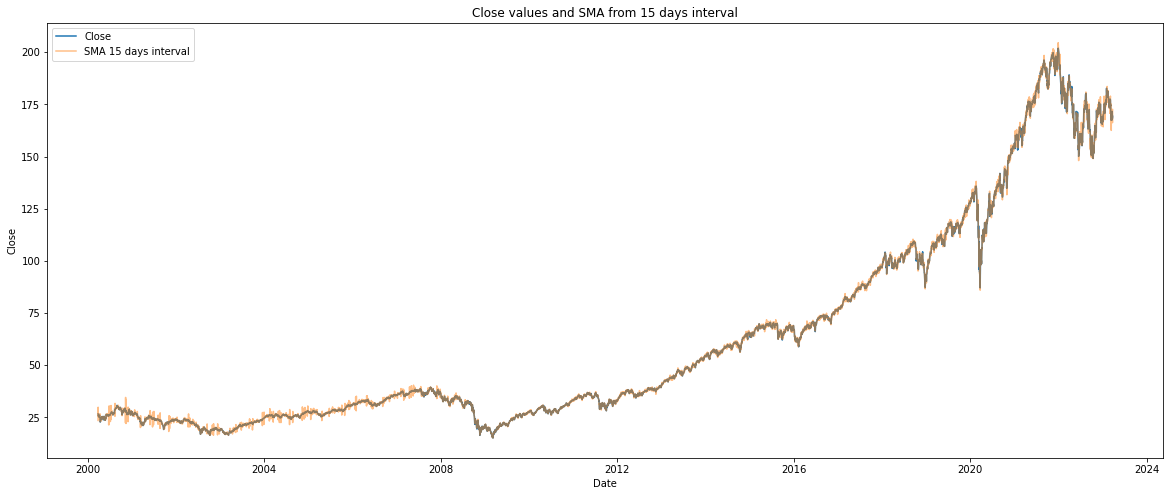

In [23]:
plt.figure(figsize=(20,8))
sns.lineplot(df['Close'],ci=None)
sns.lineplot(df['SMA_15'],ci=None , alpha=0.5)
plt.title('Close values and SMA from 15 days interval')
plt.legend(labels=['Close','SMA 15 days interval'])
plt.show()

Vemos que previo al 2008 el promedio de los 15 dias anteriores esta levemente alejado del valor de Close. Entre 2008 y 2012 se emparejan pero después de 2016 se nota desfase entre estas líneas. Veamos el último año.

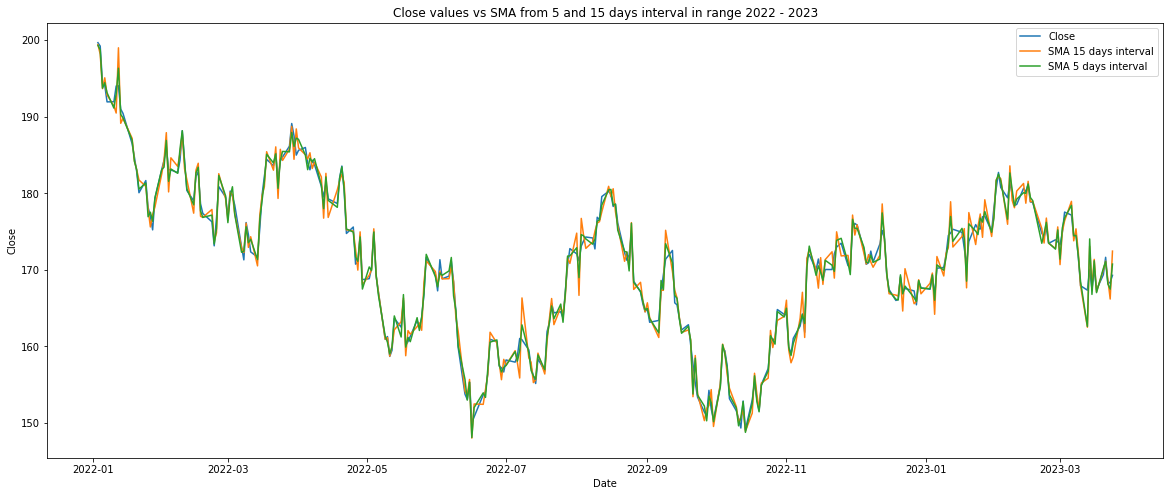

In [24]:
plt.figure(figsize=(20,8))
sns.lineplot(df['Close'].loc['2022':],ci=None)
sns.lineplot(df['SMA_15'].loc['2022':],ci=None )
sns.lineplot(df['SMA_5'].loc['2022':],ci=None )
plt.title('Close values vs SMA from 5 and 15 days interval in range 2022 - 2023')
plt.legend(labels=['Close','SMA 15 days interval','SMA 5 days interval'])
plt.show()

Close y SMA 5 days están indistinguibles, pero SMA 15 days se aleja levemente en ciertas fechas. Aún asi es una buena estimación de las variaciones diarias de Close, permitiéndonos capturar tendencias sin mucho ruido.

### Rendimiento por sector

Vamos a separar por sector

In [25]:
years = df.index.unique().year.unique()

In [26]:
years = years.astype('str')

In [27]:
sector_by_year = {year: pd.DataFrame() for year in years}

for key in years:
  df1 = df.loc[key]
  sector_by_year[key] = df1.groupby('sector')['Return'].mean().mul(100).rename("avg_return_{}".format(key))
  sector_by_year[key].index.name = None


In [28]:
sector_index = sector_by_year['2001'].index

In [29]:
res = [sector_by_year[key].values for key in years.values]

In [30]:
sectors= pd.DataFrame([sector_by_year[key].values for key in years], index=years, columns=sector_index)

In [31]:
sectors.set_index(years.values,inplace=True)

In [32]:
sectors.tail()

,Financials,Health Care,Industrials,Information Technology,Real Estate
2019,0.105780,0.037547,0.095050,0.099653,0.069754
2020,0.004438,0.035329,0.028063,0.090899,-0.037549
2021,0.032830,0.031718,-0.006906,0.008998,0.096615
2022,0.000301,0.036292,0.004212,0.008316,-0.090727
2023,0.040595,0.057429,0.099579,0.231543,0.062888


Text(0.5, 1.0, 'Average returns values by sector from 2000 to 2023')

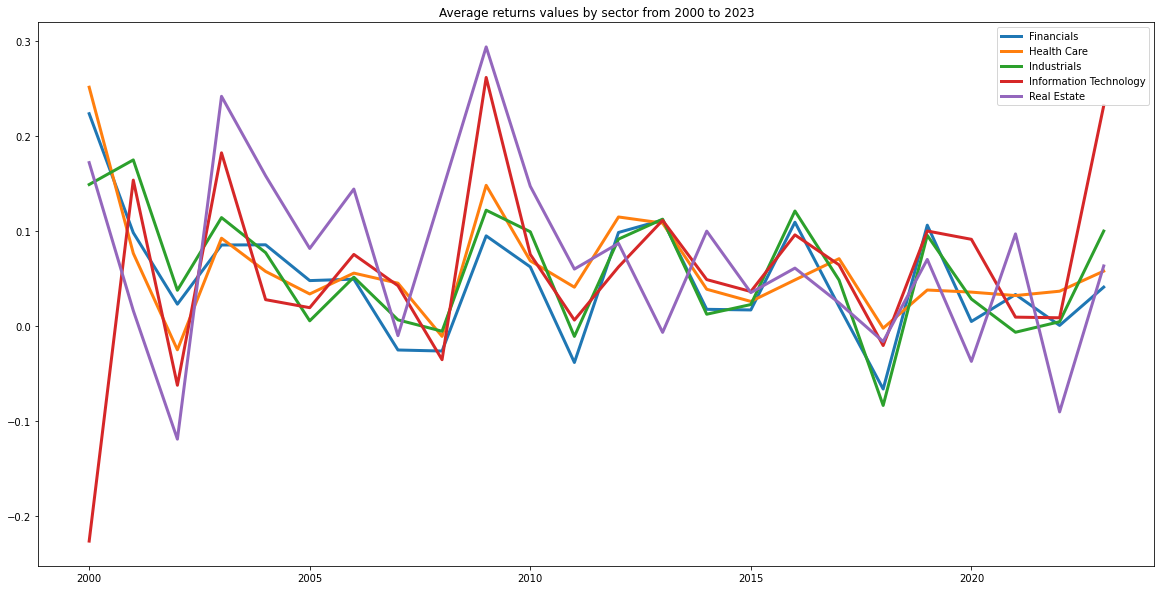

In [33]:
sectors.plot(figsize = (20,10), linewidth=3)
plt.title('Average returns values by sector from 2000 to 2023')

Information Tech y Real Estate presentan las mayores variaciones de rendimiento, con picos positivos en 2010 y Information Tech creciendo en años recientes.

Por otra parte Health Care parece presentar la menor variabilidad de rendimiento a partir del 2003.

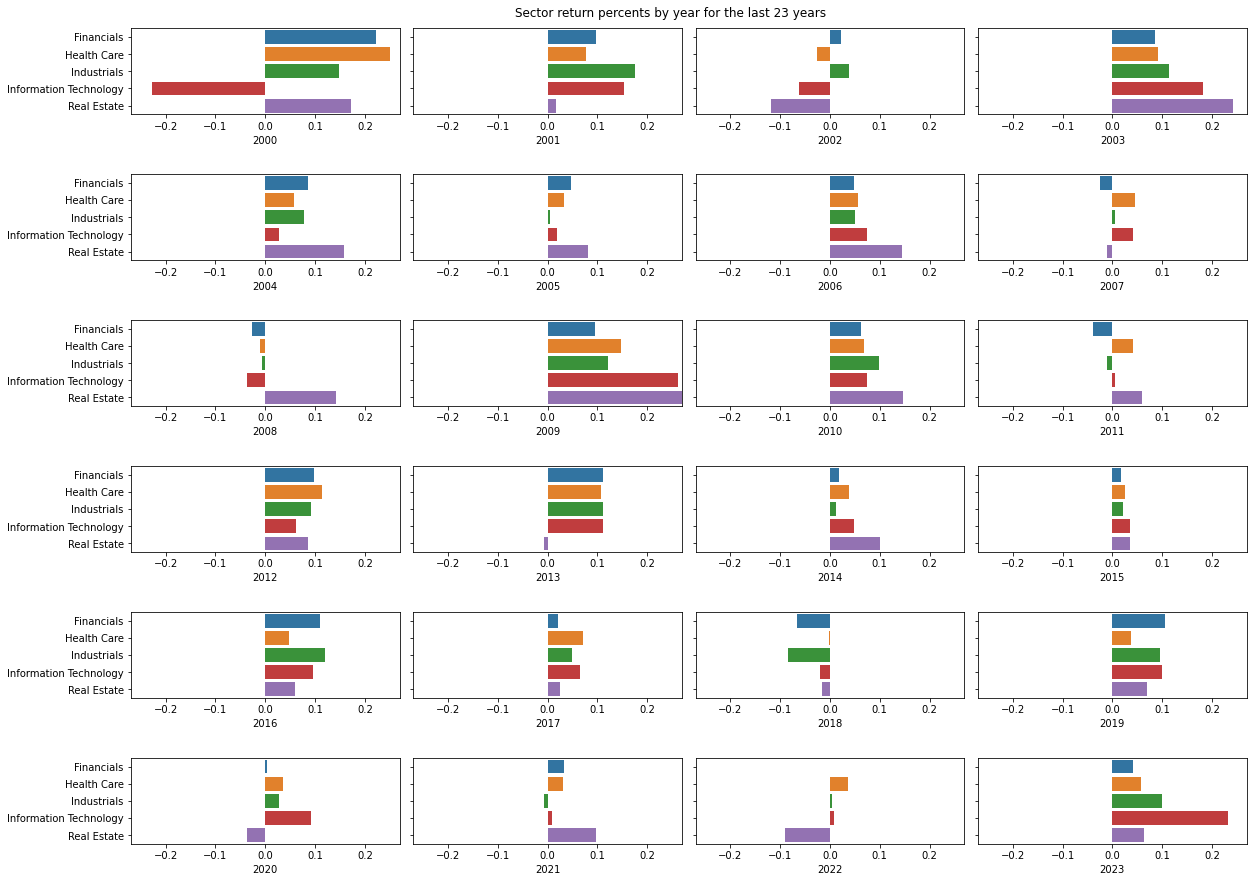

In [34]:
fig, axes = plt.subplots(6, 4, figsize=(20, 15))
 
fig.suptitle('Sector return percents by year for the last 23 years',y=0.9)
year = 0
for i in range(0,6):
  for j in range(0,4):
    ax1=axes[i,j]
    ax1.set_xlim([-0.27,0.27])
    if j > 0:
      sns.barplot(ax=ax1, y=sectors.columns, x=sectors.loc[years[year]])
      ax1.set(yticklabels=[])
    else:
      sns.barplot(ax=ax1, y=sectors.columns, x=sectors.loc[years[year]])
    plt.subplots_adjust(hspace=0.7)
    plt.subplots_adjust(wspace=0.05)
    year += 1


Vemos que luego del 2000 el sector Information Technology presenta rendimiento positivo en la mayoria de los años, siendo uno de los más altos.

Health care mantiene un leve rendimiento positivo en la mayoria de los años, con menor caida que sector Information Technology

Text(0.5, 1.0, 'Returns last 23 years by sector')

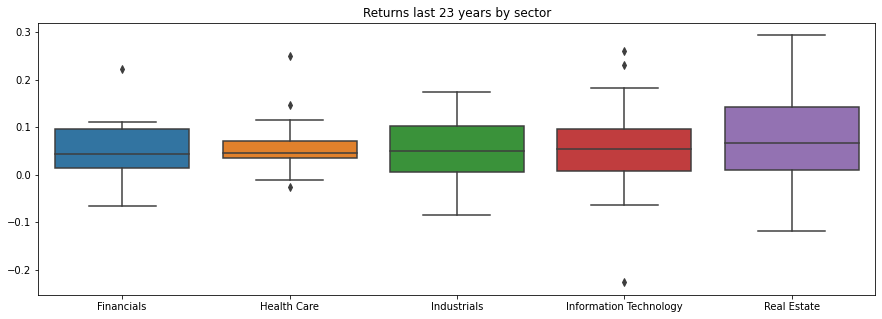

In [35]:
plt.figure(figsize=(15,5))
sns.boxplot(sectors)
plt.title('Returns last 23 years by sector')

Vemos a Real State con mayor rango de rendimiento en los últimos 23 años, tanto positivo como negativo.

Health care presenta la menor variabilidad. Seguido de Financials, con todos sus valores más cercanos a la media.

Information Technology presenta los outliers mas alejados.

### Selección empresa con menor riesgo de inversión en últimos años

Tomemos datos desde el año 2022, en el cual la mayoria de los sectores presentan rendimientos positivos, y observemos 7 maximos y 7 minimos de rendimientos por cada sector

In [88]:
lasty = df.loc['2022':'2023']

In [108]:
stock=lasty.groupby('company_name')['Return'].mean().mul(100)
stock_low=stock.nsmallest(7)[::-1].rename("Return")
stock_high=stock.nlargest(7).rename("Return")
stock=pd.concat([stock_high, stock_low], axis=0).reset_index()
stock['sector']='All'
stock['red_company_name'] = stock['company_name'].apply(lambda x: x[:21])
for i in lasty.sector.unique():
    sector=lasty[lasty.sector==i].groupby('company_name')['Return'].mean().mul(100)
    stock_low=sector.nsmallest(7)[::-1].rename("Return")
    stock_high=sector.nlargest(7).rename("Return")
    sector_stock=pd.concat([stock_high, stock_low], axis=0).reset_index()
    sector_stock['sector']=i
    sector_stock['red_company_name'] = sector_stock['company_name'].apply(lambda x: x[:21])

    stock=stock.append(sector_stock,ignore_index=True)
 

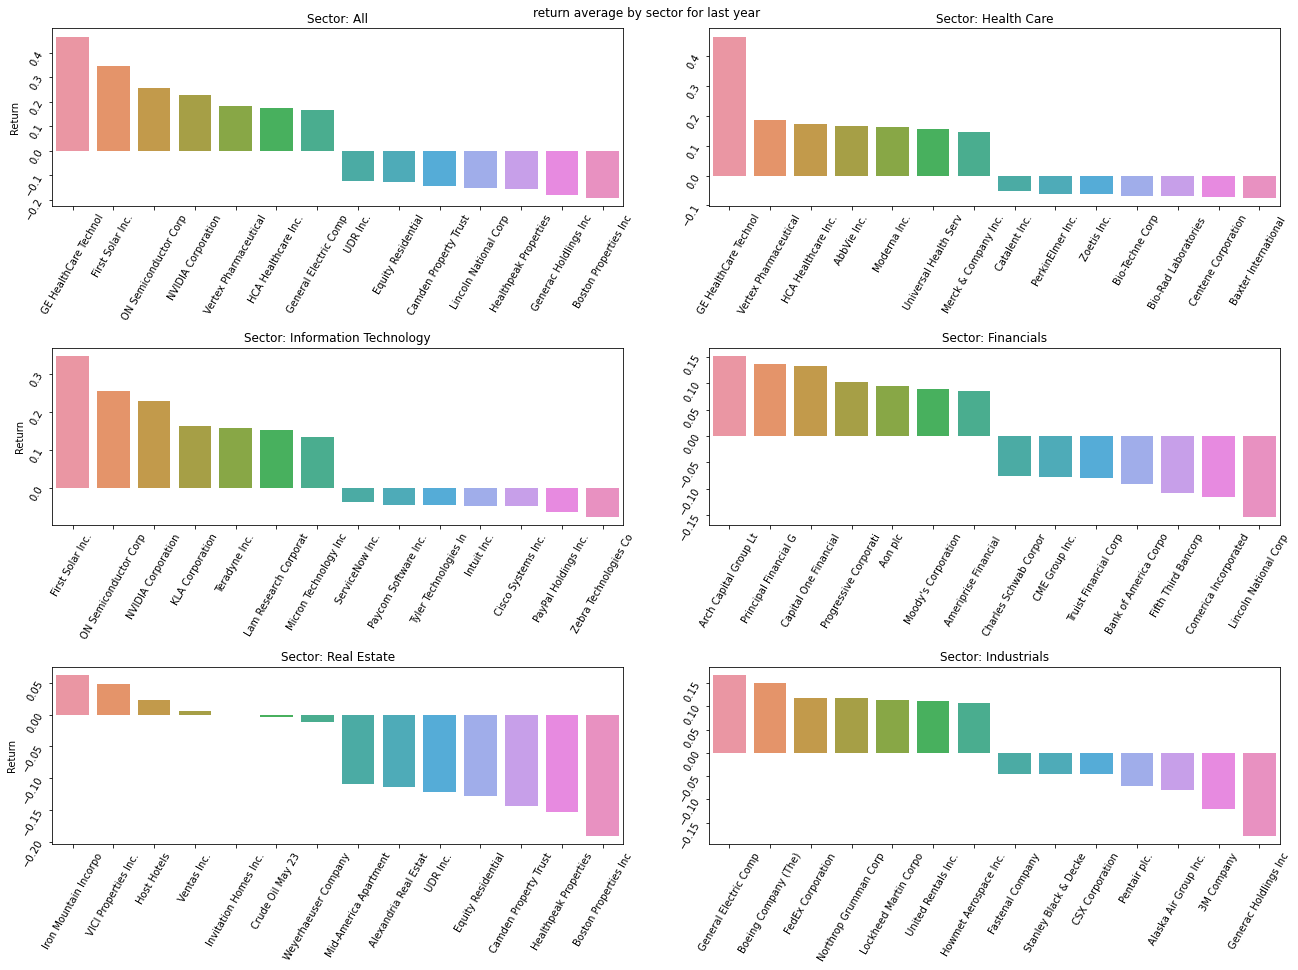

In [109]:
fig, axes = plt.subplots(3, 2, figsize=(22, 15))
 
fig.suptitle('return average by sector for last year',y=0.9)
sector_names = stock.sector.unique()
index = 0
for i in range(0,3):
  for j in range(0,2):
    ax1=axes[i,j]
    rs = stock[stock.sector == sector_names[index]]
    if j > 0:
      sns.barplot(ax=ax1, x=rs.red_company_name, y=rs.Return)
      ax1.set(ylabel=None)
    else:
      sns.barplot(ax=ax1, x=rs.red_company_name, y=rs.Return)
    ax1.set(xlabel=None)
    ax1.set(title=f'Sector: {sector_names[index]}')
    plt.subplots_adjust(hspace=0.8)
    plt.subplots_adjust(wspace=0.15)
    ax1.tick_params(labelrotation=60)
    index += 1
    

De las 5 empresas con mayor rendimiento en los último año, 2 son del sector tech, 1 del sector Financials, una de Health Care y una del sector industrial.

Veamos la correlación entre los valores de cierre de cada una de esas 5 empresas. 

In [90]:
five_companies = stock[stock.sector == 'All'].iloc[:5]

In [91]:
company_names = five_companies.company_name.values

In [92]:
most5comp = lasty[lasty.company_name.isin(company_names)]

In [93]:
most5_df=most5comp.pivot_table(index=most5comp.index.values, columns='company_name', values='Close')

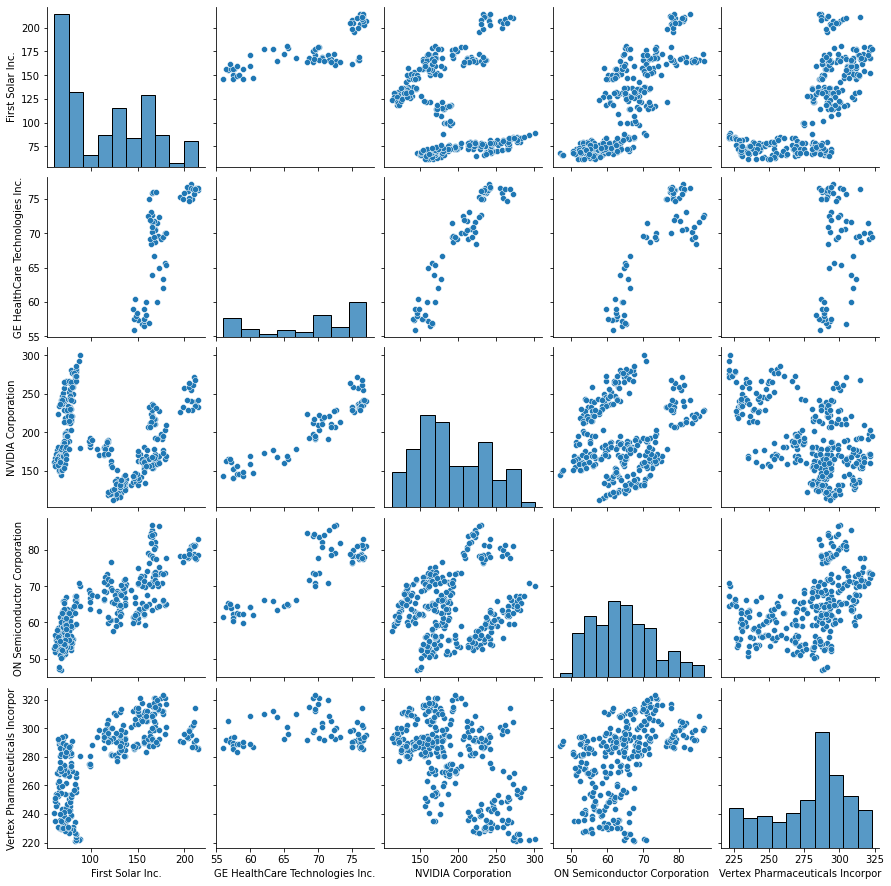

In [94]:
sns.pairplot(most5_df)

<Axes: xlabel='company_name', ylabel='company_name'>

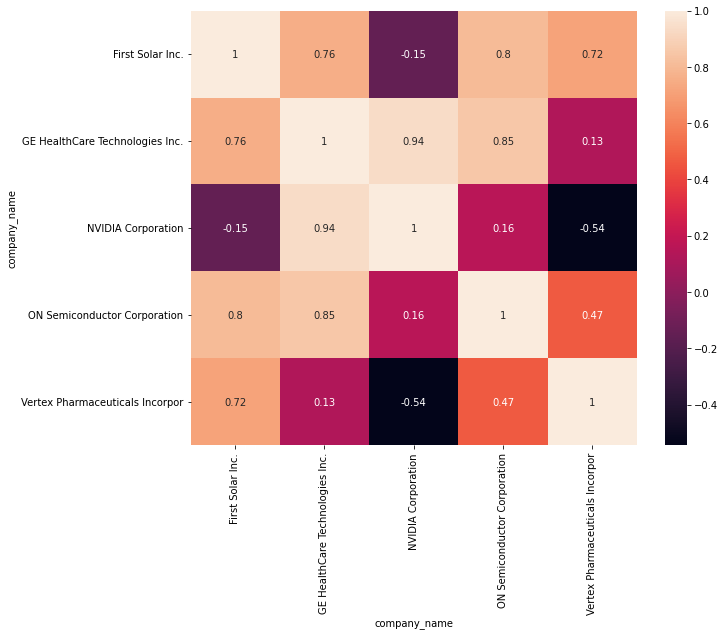

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(most5_df.corr(), annot=True)

Vemos una fuerte correlacion positiva de valores de cierre entre Nvidia y GE HealthCare Tech.  

Tenemos una leve correlación negativa entre Nvidia y Vertex Pharma.

La manera más basica de calcular riesgo de inversión es usar el rendimiento (Return) comparando el valor esperado con la desviación estandar de los valores de Return diario

In [110]:
most5comp = lasty[lasty.company_name.isin(company_names)]

In [97]:
# reordenamos la tabla de manera que las columnas son los nombres de empresas y los valores solo de Return
most5_df=most5comp.pivot_table(index=most5comp.index.values, columns='company_name', values='Return')

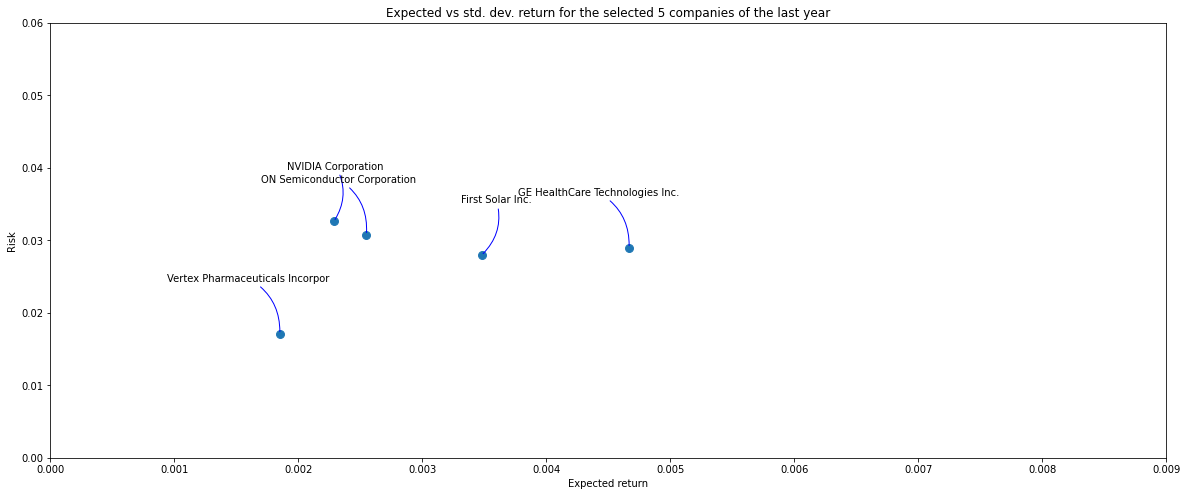

In [107]:
area = np.pi * 20

plt.figure(figsize=(20, 8))
plt.scatter(most5_df.mean(), most5_df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')
plt.title('Expected vs std. dev. return for the selected 5 companies of the last year')
plt.ylim(0,0.06)
plt.xlim(0,0.009)
for label, x, y in zip(most5_df.columns, most5_df.mean(), most5_df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


Vemos que GE HealthCare Tech. presenta bajo riesgo y el más alto rendimiento esperado. 
 

Siguiendo nuestro criterio elegimos recomendar invertir en GE HealthCare Tech., del sector HealthCare.